In [72]:
# import lib
import sys
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from kumaraswamy import kumaraswamy
sns.set_style('darkgrid')
np.random.seed(42)

In [ ]:
# Define the multi-armed bandits
nb_bandits = 3  # Number of bandits
# True probability of winning for each bandit
p_bandits = [0.25, 0.55, 0.90]

def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0
    
def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(-0.5, 1.5, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    #ax.set_xlim([0, 1])
    #ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')
    
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0]  # Number of times we tried each bandit
wins   = [0, 0, 0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
#     bandit_priors = [stats.beta (a=1+w,b=1+t-w) for t, w in zip(trials, wins)]
#     bandit_priors = [kumaraswamy(a=1+w,b=1+t-w) for t, w in zip(trials, wins)]
    bandit_priors = [stats.uniform(w/(t+0.000000001),1/step+w/(t+0.000000001)) for t, w in zip(trials, wins)]

    if step in plots: plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [d.rvs(size=1) for d in bandit_priors]
    print(theta_samples)
    
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    x = pull(chosen_bandit)
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1; wins  [chosen_bandit] += x

plt.tight_layout()
plt.show()

[array([0.71049332]), array([0.30828341]), array([0.85385191])]
[array([0.49919076]), array([0.00019985]), array([1.16423456])]
[array([0.00850253]), array([0.26077982]), array([1.07036238])]
[array([0.01314211]), array([0.06318182]), array([2.05159602])]
[array([0.08290527]), array([0.19398779]), array([1.34553688])]
[array([0.13380022]), array([0.04922142]), array([1.05693639])]
[array([0.05578391]), array([0.01941686]), array([0.89870318])]
[array([0.08448884]), array([0.05147478]), array([1.73736643])]
[array([0.07892172]), array([0.10101281]), array([1.70403885])]
[array([0.06806364]), array([0.04136658]), array([1.52889498])]
[array([0.03952201]), array([0.01904961]), array([0.93783782])]
[array([0.07203578]), array([0.00213152]), array([1.10363558])]
[array([0.05122283]), array([0.01317148]), array([0.97299807])]
[array([0.05847927]), array([0.00251678]), array([1.27052676])]
[array([0.00871613]), array([0.01572979]), array([1.46151411])]
[array([0.01795891]), array([0.03047046]

[array([8.68921748e-05]), array([0.00726271]), array([1.48515587])]
[array([0.00070527]), array([0.00510327]), array([1.18104394])]
[array([0.00688802]), array([0.00532824]), array([1.80546005])]
[array([0.00201378]), array([0.00182189]), array([0.97931224])]
[array([0.00042839]), array([0.00611921]), array([1.60828068])]
[array([0.00013339]), array([4.32333687e-05]), array([1.09364118])]
[array([0.00322472]), array([0.00412178]), array([1.61402351])]
[array([0.00112142]), array([0.00559475]), array([1.2130103])]
[array([0.00530772]), array([0.00648708]), array([1.74722779])]
[array([0.00347006]), array([0.00064048]), array([1.79057083])]
[array([0.00135226]), array([0.00608826]), array([1.79805169])]
[array([0.00082316]), array([0.00330514]), array([1.66040772])]
[array([0.00089591]), array([0.0011614]), array([1.7051244])]
[array([0.00473716]), array([0.00250378]), array([1.40144909])]
[array([0.00219802]), array([0.00449859]), array([1.06348729])]
[array([0.00518967]), array([0.0055

[array([0.0001287]), array([0.00306605]), array([0.94932359])]
[array([0.00195881]), array([0.00061261]), array([1.31559671])]
[array([0.00110537]), array([0.0009763]), array([1.0086656])]
[array([0.00032212]), array([0.00276537]), array([1.73479188])]
[array([0.00038819]), array([0.00200814]), array([0.98655998])]
[array([0.00292108]), array([0.00192756]), array([1.68662728])]
[array([0.00098767]), array([0.00225037]), array([0.90633631])]
[array([0.00084683]), array([0.00333493]), array([1.26629278])]
[array([0.00259568]), array([0.00274189]), array([1.56542452])]
[array([0.00242427]), array([0.00193996]), array([1.44087914])]
[array([0.00090936]), array([0.00327706]), array([1.16345744])]
[array([0.000655]), array([0.00048632]), array([1.09023659])]
[array([0.00321339]), array([0.00114056]), array([1.19451972])]
[array([0.00124301]), array([0.00317218]), array([1.24427037])]
[array([0.00185205]), array([0.00271551]), array([1.41328776])]
[array([0.00042902]), array([0.00324489]), ar

In [71]:
# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))

True prob=0.25;  Emperical prob=0.30;  Trials=69
True prob=0.55;  Emperical prob=0.59;  Trials=119
True prob=0.90;  Emperical prob=0.90;  Trials=812


[ 0.20264065 -0.3246262  -1.66632893  2.26444456  1.16672842]


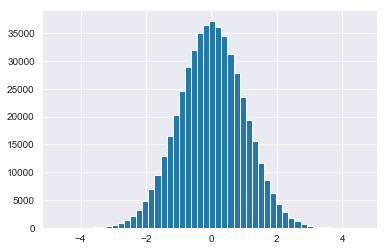

In [22]:
from scipy.stats import norm
gen = norm()
print(gen.rvs(size=5))
plt.hist(gen.rvs(size=500000),50)
plt.show()

# Reference 
1. Kite - AI-Powered Python Copilot. (2019). Kite.com. Retrieved 9 January 2019, from https://kite.com/python/docs/scipy.stats.distributions.rv_frozen.rvs
2. Multi-armed bandit implementation. (2019). Peterroelants.github.io. Retrieved 9 January 2019, from https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
3. kumaraswamy. (2018). PyPI. Retrieved 9 January 2019, from https://pypi.org/project/kumaraswamy/
